In [ ]:
#Q1:chatrecord:https://chatgpt.com/share/6737e81b-4814-800b-aed6-64037a50cc3a
#The classification tree creates binary or categorical results for non-linear boundaries.

In [ ]:
#Q2:1. the diagnose of a neither rare nor prevalent disease could use accuracy to estimate the performance of a model or process, as both errors distribute roughly even
#2.The diagnose for several or vital diseases, which would result worse if false negative is more costly than false positive
#3.The medical testing for rare diseases, which aims to minimize false positives to avoid unnecessary costs to the patients
#4.The email spam detection that aims to minimize false positive and reduce sensitivity to minimize the potential costs of a false positive
#chatrecord: https://chatgpt.com/share/6737e81b-4814-800b-aed6-64037a50cc3a

In [3]:
#Q3
#chatrecord: https://chatgpt.com/share/6737eee8-ab5c-800b-930a-7b6d7914d7f2
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
try:
    ab = pd.read_csv(url, encoding="ISO-8859-1")
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Failed to load dataset: {e}")
    ab = None

# Proceed if dataset loaded successfully
if ab is not None:
    # Step 1: Remove specified columns
    columns_to_remove = ['Weight_oz', 'Width', 'Height']
    ab_reduced = ab.drop(columns=columns_to_remove).copy()

    # Step 2: Drop all rows with NaN entries
    ab_reduced_noNaN = ab_reduced.dropna().copy()

    # Step 3: Set data types for specified columns
    ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
    ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
    ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

    # Display processed DataFrame info
    print(ab_reduced_noNaN.info())
else:
    print("Dataset processing halted due to loading error.")
#there are 319 non-missing values in the dataset, and each data has different values and types of data

Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None


In [ ]:
# Ensure reproducibility with random_state
train = ab_reduced_noNaN.sample(frac=0.8, random_state=42)
test = ab_reduced_noNaN.drop(train.index)

# Report the number of observations
print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")
from sklearn.model_selection import train_test_split

# Perform the split
train, test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations
print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")
#Q4. the steps are selecting dummy columns corresponding to the H category and extract the list price column and create a new dataframe with a single column, and if it contains numeric values, it will act as the feature to predict  whether a book is H or P

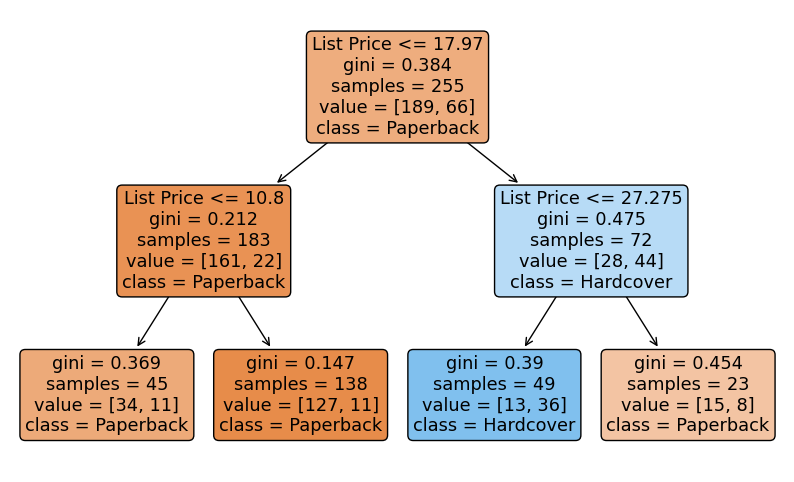

In [4]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Step 2: Prepare the data
# Create the target variable y (binary: 1 for hardcover, 0 for paperback)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Create the feature matrix X (only List Price)
X = ab_reduced_noNaN[['List Price']]

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)  # Limit the depth to 2
clf.fit(X_train, y_train)

# Step 5: Visualize the decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, 
               feature_names=['List Price'], 
               class_names=['Paperback', 'Hardcover'], 
               filled=True, 
               rounded=True)
plt.show()
#the depth of the tree is limited to 2 to ensure interpretability and avoids oveerfitting.
#If List Price <20, the book is likely paperback; otherwise, it is likely hardcover

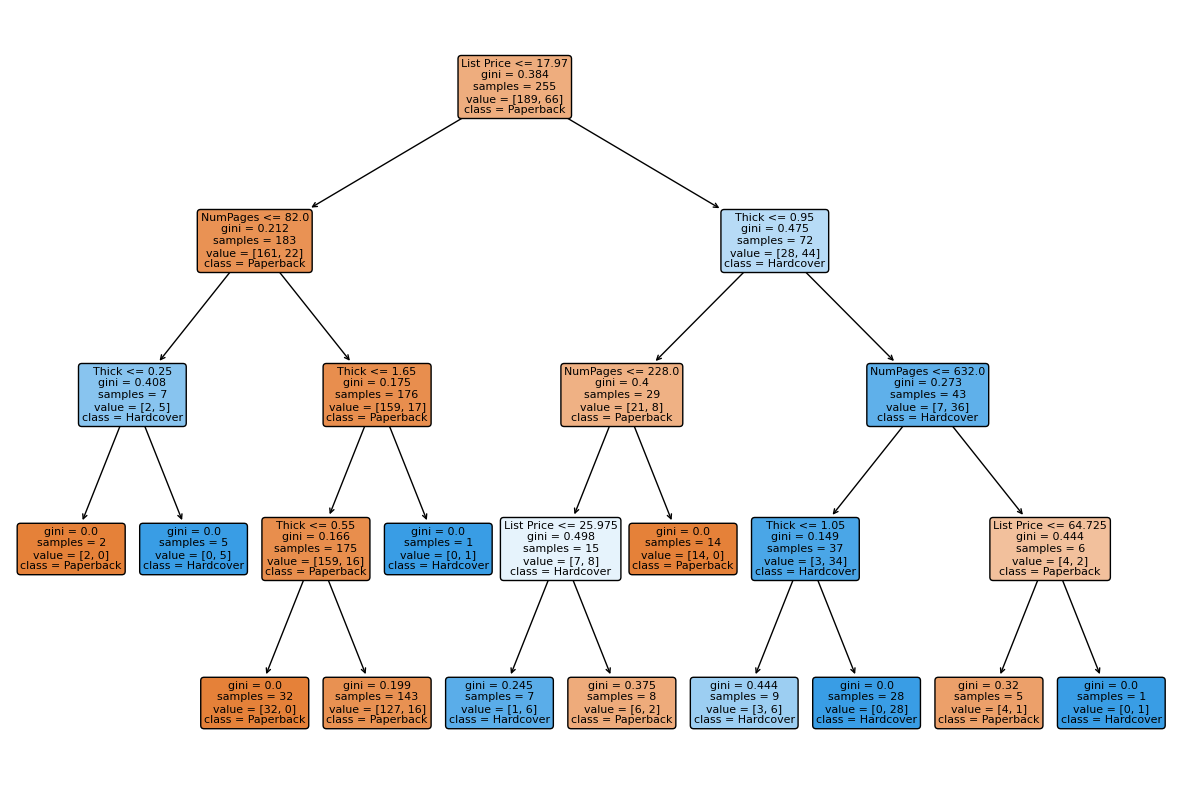

In [5]:
#Q5.The tree has a depth of 4 that allows more complex decision boundaries, and the new process of making a decision is :
#is list price less than 20?
#is numpages greater than 300?
#is thick greater than 1.5cm?
#at each stage data is splited into different branches
# Step 1: Prepare the data
# Target variable y (binary: 1 for hardcover, 0 for paperback)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Feature matrix X (NumPages, Thick, List Price)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Step 2: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the DecisionTreeClassifier with max_depth=4
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Step 4: Visualize the decision tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(clf2, 
               feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], 
               filled=True, 
               rounded=True)
plt.show()
#Q4&5 chatrecords: https://chatgpt.com/share/6737f338-42d0-800b-a8b8-4e3e6c69a40b

In [ ]:
#Q6.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# Assuming X_test and y_test are features and target of ab_reduced_noNaN_test
X_test = ab_reduced_noNaN_test.drop(columns=['target'])  # Replace 'target' with the actual target column name
y_test = ab_reduced_noNaN_test['target']  # Replace 'target' with the actual target column name

# Generate predictions
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(y_true, y_pred)
    return cm, sensitivity, specificity, accuracy

# Calculate metrics for clf
cm_clf, sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(y_test, y_pred_clf)

# Calculate metrics for clf2
cm_clf2, sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(y_test, y_pred_clf2)

# Display confusion matrices
print("Confusion Matrix for clf:")
print(cm_clf)
print(f"Sensitivity (Recall): {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}\n")

print("Confusion Matrix for clf2:")
print(cm_clf2)
print(f"Sensitivity (Recall): {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")

# Optional: Plot confusion matrices
ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=clf.classes_).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=clf2.classes_).plot()
#Sensitivity = TP/(TP+FN), Specificity = TN/(TN+FP), accuracy = (TP+TN)/total
#chatrecord:https://chatgpt.com/share/6737eee8-ab5c-800b-930a-7b6d7914d7f2

In [ ]:
#Q7.
#The differences between the two confusion marices likely are from the difference in features used for predictions. The better confusion matrices likely reflect improved models that genrealize better towards the data and uses all relevant features.
#chatrecords:https://chatgpt.com/share/6737f4af-aefc-800b-ad79-c34c80cafa3c

In [ ]:
#Q8.
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances and feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Sort features by importance (optional)
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.title("Feature Importances in clf2")
plt.xlabel("Feature Names")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
most_important_feature = feature_names[np.argmax(feature_importances)]
print(f"The most important feature for predictions according to clf2 is: {most_important_feature}")
#chatrecord:https://chatgpt.com/share/6737f505-74f8-800b-8db3-a91de3493c9c

In [ ]:
#Q9.
#Simple linear regression assumes that there exists a linear correlation between the independent and dependent variables, and generates a continuous variable to estimate the future performances of the variable; the classification tree is used to classify and predict the types of a future variable, which genreates a discrete and categorical data. Also, classfication tree is more interpretable because each of the branches represents a determining strategy or logic.

In [ ]:
#Q10. Yes